In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.style.use('fivethirtyeight')
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
plt.style.use('fivethirtyeight')
from matplotlib import rc

plt.rc('text', usetex=True)
plt.rc('font', family='sans')

# Module 05 - project _build an example_

This is your chance to build something important to you and/or your career. If you're interested in cars you can create a drivetrain model. If you want to get into biomechanics you can model an orthopedic joint or build a 2D model of someone walking. If you love toys (_I know Prof. Cooper does!_) you can model a yoyo spinning on a cord or a spinning top or measure the coefficient of restitution of a bouncy ball on concrete. 

Some tips:
- __start simple__ its often easier to _add_ complexity rather than _remove_
  complexity if you're considering a 6-DOF system, try a 1-DOF part, then add
components incrementally
- __use what you have__ you have working models for four-bar linkages,
  pendulums, and a yoyo despinning mechanism can you take your system and model
a piece of it as a pendulum? is angular momentum conserved?
- __communicate__ let us know what you're working on simple sketches are great!
  don't get hung up on a final result until you have some sketches and
conversations
- __always draw a FBD__ this step is _so often_ skipped, but its really where
  the bulk of your engineering work is decided. The FBD is your main
contribution to any engineering project, everything else is a combination of
puzzle-solving and applied mathematics


/opt/conda/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/opt/conda/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


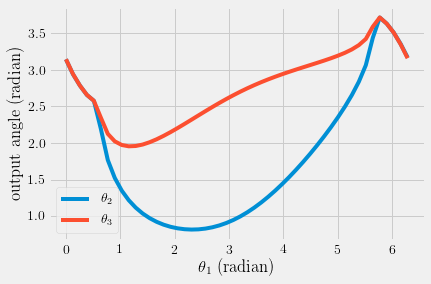

In [33]:
l1 = 0.25 #m length of my forearm
l2 = 0.3 #m length of my bicep and shoulder
l3 = 0.55 #m length of both my forearm and bicep and shoulder
a1 = np.pi/2
dy = 0
dx = 0.41 #the measured distance between my two shoulders, meaning l1 and l3
Fbar = lambda a1,x: np.array([l1*np.sin(a1)+l2*np.sin(x[0])-l3*np.sin(x[1])-dy,
                           l1*np.cos(a1)+l2*np.cos(x[0])-l3*np.cos(x[1])-dx])
a1 = np.linspace(0, 2*np.pi)
a2 = np.zeros(len(a1))
a3 = np.zeros(len(a1))
xsol = np.array([0, np.pi/4])
for i in range(len(a1)):
    xsol = fsolve(lambda x: Fbar(a1[i], x), xsol)
    a2[i] = xsol[0]
    a3[i] = xsol[1]
plt.plot(a1, a2, label = r'$\theta_2$')
plt.plot(a1, a3, label = r'$\theta_3$')
plt.xlabel(r'$\theta_1$ (radian)')
plt.ylabel('output angle (radian)')
plt.legend();
#this looks like the swing I am trying to achieve since the links are limited in their range

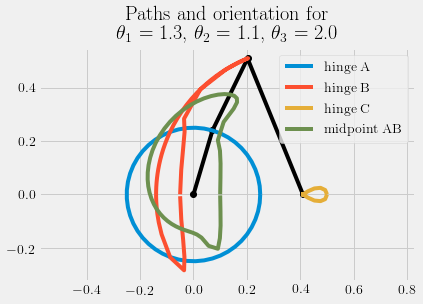

In [34]:
rA = l1*np.vstack([np.cos(a1), np.sin(a1)])
rB = rA + l2*np.vstack([np.cos(a2), np.sin(a2)])
rC = rB - l3*np.vstack([np.cos(a3), np.sin(a3)])
rP = rA + l2/2*np.vstack([np.cos(a2), np.sin(a2)])
links_x_locations = np.vstack([np.zeros(len(a1)), 
                              rA[0, :],
                              rB[0, :],
                              rC[0, :]])
links_y_locations = np.vstack([np.zeros(len(a1)), 
                              rA[1, :],
                              rB[1, :],
                              rC[1, :]])
i = 10
plt.plot(links_x_locations[:, i], 
        links_y_locations[:, i], 'k-o')
plt.plot(rA[0,:], rA[1,:], label = 'hinge A')
plt.plot(rB[0,:], rB[1,:], label = 'hinge B')
plt.plot(rC[0,:], rC[1,:], label = 'hinge C')
plt.plot(rP[0,:], rP[1,:], label = 'midpoint AB')
plt.legend()
plt.title('Paths and orientation for\n'+ 
          r'$\theta_1$ = {:.1f}, $\theta_2$ = {:.1f}, $\theta_3$ = {:.1f}'.format(a1[i], a2[i], a3[i]))
plt.axis('equal');

Text(0, 0.5, 'output angular speed (radian/s)')

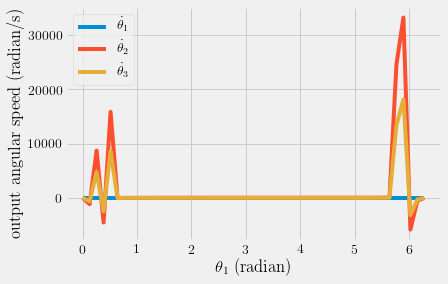

In [24]:
drive_rate = 10 #rad/s
dFbar = lambda a1, a2, a3, dx: np.array([l1*drive_rate*np.sin(a1)+\
                                         l2*dx[0]*np.sin(a2)-\
                                         l3*dx[1]*np.sin(a3),\
                                         l1*drive_rate*np.cos(a1)+\
                                         l2*dx[0]*np.cos(a2)-\
                                         l3*dx[1]*np.cos(a3)])
da1 = np.ones(len(a1))*10
da2 = np.zeros(len(a1))
da3 = np.zeros(len(a1))
xsol = np.array([0, 0])


for i in range(len(a1)):
    xsol = fsolve(lambda dx: dFbar(a1[i], a2[i], a3[i], dx), xsol)
    da2[i] = xsol[0]
    da3[i] = xsol[1]
plt.plot(a1, da1, label = r'$\dot{\theta}_1$')
plt.plot(a1, da2, label = r'$\dot{\theta}_2$')
plt.plot(a1, da3, label = r'$\dot{\theta}_3$')
plt.legend()
plt.xlabel(r'$\theta_1$ (radian)')
plt.ylabel('output angular speed (radian/s)')

## Proposed Outline:

### Background

- What are you trying to model?
    I am trying to simulate a good golf swing with the circular shape of the shoulders. The model is simplified because it acts in a four-bar linkage design. The bicep and forearm of one arm (made into two links, l1 and l2) and the other entire arm (l3). Free body diagram and motion of golf swing is shown in the jpeg (l1 and l2 should be switched). [IMG_5C3DE768BA33-1.jpeg](attachment:IMG_5C3DE768BA33-1.jpeg)
    
    I used my model from the Module 2, the four bar linkage design. It still could use work, but the general idea    is there. Firstly, I defined my variable values l1 is the length of my forearm, l2 is the length of bicep, l3       is the length of the other arm, and dx is the length between my two shoulders (the model of the graph called       'Path and Orientation For...' shows this in birds-eye-view of my model). I then defined the motion of the           hinges and their angles, plotted in the first graph 'output angle vs. theta 1' and second graph 'Paths and         Orientation for.' I then found the angular velocity plotted in third graph, 'output angular speed vs theta.' 
    My assumptions are that the model returns back to the same place as the start of the swing right before hitting  the ball otherwise it cannot hit the ball. My constraints are that one arm has no hinge while the other does;       this allows for a good and extended backswing but limits the front swing because it cannot move passed the full     extension of the arm containing l1 and l2. This is due to the fact that l3 cannot bend to allow for the             extension of the back arm (l1 and l2). The equations are used are in my code above. I used my Newton-Euler         equations and constraint vectors to define postions of linkages. My analysis is shown above and graphs of my work are displayed above to demonstrate the angles, angular speed, and hinge movement.
   

  Originally I set up my linkage to run just the back arm: one link was the entire arm (including forearm and bicep), one link was the stationary collor bone area, and one link represented the spine. This model was not suitable to demonstrate the swing and professor helped me to change my model to include both arms and making one arm represented as a whole and and the second arm split at the elbow. This allowed me to meet my goal because it allowed for a fuller and more complete demonstration and analysis of the rotation of the golf swing.I have played golf my whole life and always knew the importance of the back swing but never realized how important the front swing is. Without full extension the ball cannot go its full potential. Since beginning this project I have focused more on my front swing and I have seen improvement in my game and reduced problems such as slicing (if you are a righty you hit the ball to the right and vice versa), as I thought my problem was my backswing but it was jut the lazy follow-through of my front swing that made me push the ball. I could improve the analysis of this device by splitting my front arm (l3) to have a hinge to allow for full extension of the front swing. 
